In [1]:
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import cv2
from matplotlib import pyplot as plt
from qiskit import *
from qiskit.circuit.library import *
c4xgate = C4XGate()
c3xgate = C3XGate()

In [2]:
#创建初始量子电路
#在开始创建电路要考虑好所需的量子比特数（包括中间用于存储的辅助量子比特）以及需要用来存储测量信息的经典比特数
qc = QuantumCircuit(12, 12)

In [3]:
#用h门创建均匀叠加态
#此处搭建的是论文中已经压缩后的量子电路
#具体思路可以参考姜楠了老师的论文A novel quantum image compression method based on JPEG和张毅老师的NEQR
#qiskit中给定义了x门，cnot门，c3not门和c4not门，此处为降低时间复杂度，没有将量子线路全部分解为单量子门，折中的以4Cnot门作为基础
#以此来分解n-cnot门，这会在后面的代码中有所体现，但此处直接使用4cnot门用以完成线路搭建
#此处为第一组量子电路
for i in range(4):
    qc.h(i)
    if i == 1:
        continue;
    qc.x(i)
for i in range(8):
    qc.append(c4xgate, [0, 1, 2, 3, i+4])
for i in range(4):
    if i == 1:
        continue;
    qc.x(i)

In [4]:
#此处为第二组量子电路
qc.barrier([0,1,2,3])
for i in range(4):
    if i == 0:
        continue;
    qc.x(i)
for i in range(8):
    qc.append(c4xgate, [0, 1, 2, 3, i+4])
qc.barrier([0,1,2,3])
for i in range(4):
    if i == 0:
        continue;
    qc.x(i)

In [5]:
#此处为第三组量子电路
qc.barrier([0,1,2,3])
for i in range(4):
    if i == 1 or i == 3:
        continue;
    qc.x(i)
for i in range(8):
    qc.append(c3xgate, [0, 2, 3, i+4])
for i in range(4):
    if i == 1 or i == 3:
        continue;
    qc.x(i)

In [6]:
#此处为第四组量子电路
qc.barrier([0,1,2,3])
qc.x(3)
for i in range(8):
    qc.append(c3xgate, [1, 2, 3, i+4])
qc.x(3)

In [7]:
qc.draw()

┌───┐┌───┐                                        ┌───┐ ░                »
 q_0: ┤ H ├┤ X ├──■────■────■────■────■────■────■────■──┤ X ├─░────────■────■──»
      ├───┤└───┘  │    │    │    │    │    │    │    │  └───┘ ░ ┌───┐  │    │  »
 q_1: ┤ H ├───────■────■────■────■────■────■────■────■────────░─┤ X ├──■────■──»
      ├───┤┌───┐  │    │    │    │    │    │    │    │  ┌───┐ ░ ├───┤  │    │  »
 q_2: ┤ H ├┤ X ├──■────■────■────■────■────■────■────■──┤ X ├─░─┤ X ├──■────■──»
      ├───┤├───┤  │    │    │    │    │    │    │    │  ├───┤ ░ ├───┤  │    │  »
 q_3: ┤ H ├┤ X ├──■────■────■────■────■────■────■────■──┤ X ├─░─┤ X ├──■────■──»
      └───┘└───┘┌─┴─┐  │    │    │    │    │    │    │  └───┘ ░ └───┘┌─┴─┐  │  »
 q_4: ──────────┤ X ├──┼────┼────┼────┼────┼────┼────┼───────────────┤ X ├──┼──»
                └───┘┌─┴─┐  │    │    │    │    │    │               └───┘┌─┴─┐»
 q_5: ───────────────┤ X ├──┼────┼────┼────┼────┼────┼────────────────────┤ X ├»
                     └───┘┌─┴─┐  │    │    │    │    │                    └───┘»
 q_6: ────────────────────┤ X ├──┼────┼────┼────┼────┼─────────────────────────»
                          └───┘┌─┴─┐  │    │    │    │                         »
 q_7: ─────────────────────────┤ X ├──┼────┼────┼────┼─────────────────────────»
                               └───┘┌─┴─┐  │    │    │                         »
 q_8: ──────────────────────────────┤ X ├──┼────┼────┼─────────────────────────»
                                    └───┘┌─┴─┐  │    │                         »
 q_9: ───────────────────────────────────┤ X ├──┼────┼─────────────────────────»
                                         └───┘┌─┴─┐  │                         »
q_10: ────────────────────────────────────────┤ X ├──┼─────────────────────────»
                                              └───┘┌─┴─┐                       »
q_11: ─────────────────────────────────────────────┤ X ├───────────────────────»
                                                   └───┘                       »
c: 12/═════════════════════════════════════════════════════════════════════════»
                                                                               »
«                                     ░       ░ ┌───┐                         »
« q_0: ──■────■────■────■────■────■───░───────░─┤ X ├──■────■────■────■────■──»
«        │    │    │    │    │    │   ░ ┌───┐ ░ └───┘  │    │    │    │    │  »
« q_1: ──■────■────■────■────■────■───░─┤ X ├─░────────┼────┼────┼────┼────┼──»
«        │    │    │    │    │    │   ░ ├───┤ ░ ┌───┐  │    │    │    │    │  »
« q_2: ──■────■────■────■────■────■───░─┤ X ├─░─┤ X ├──■────■────■────■────■──»
«        │    │    │    │    │    │   ░ ├───┤ ░ └───┘  │    │    │    │    │  »
« q_3: ──■────■────■────■────■────■───░─┤ X ├─░────────■────■────■────■────■──»
«        │    │    │    │    │    │   ░ └───┘ ░      ┌─┴─┐  │    │    │    │  »
« q_4: ──┼────┼────┼────┼────┼────┼──────────────────┤ X ├──┼────┼────┼────┼──»
«        │    │    │    │    │    │                  └───┘┌─┴─┐  │    │    │  »
« q_5: ──┼────┼────┼────┼────┼────┼───────────────────────┤ X ├──┼────┼────┼──»
«      ┌─┴─┐  │    │    │    │    │                       └───┘┌─┴─┐  │    │  »
« q_6: ┤ X ├──┼────┼────┼────┼────┼────────────────────────────┤ X ├──┼────┼──»
«      └───┘┌─┴─┐  │    │    │    │                            └───┘┌─┴─┐  │  »
« q_7: ─────┤ X ├──┼────┼────┼────┼─────────────────────────────────┤ X ├──┼──»
«           └───┘┌─┴─┐  │    │    │                                 └───┘┌─┴─┐»
« q_8: ──────────┤ X ├──┼────┼────┼──────────────────────────────────────┤ X ├»
«                └───┘┌─┴─┐  │    │                                      └───┘»
« q_9: ───────────────┤ X ├──┼────┼───────────────────────────────────────────»
«                     └───┘┌─┴─┐  │                                           »
«q_10: ────────────────────┤ X ├──┼───────────────────────────────────────────»
«                          └───┘┌─┴─┐                      

In [8]:
#测量，由于qiskit中测量结果是反着排序的，所以在测量时需要提前反着来
for i in range(12):
    qc.measure(11 - i, i)

In [9]:
#初始化qasm模拟器，此时可将电脑视作量子计算机，因此此时模拟的是无噪声情况下的理想量子计算机
qasm_sim = Aer.get_backend('qasm_simulator')
#自动优化量子电路
t_qc = transpile(qc, qasm_sim)
#设定测量次数，一般为2的n次
qobj = assemble(t_qc, shots=1024)
#获取结果
result = qasm_sim.run(qobj).result()
counts = result.get_counts(qc)
#由于结果是以字典的形式存储的，打印结果可以看到前为实际序列，后为测量到的次数
print(counts)

{'000000000000': 58, '000111111111': 73, '001000000000': 65, '001100000000': 54, '010011111111': 61, '010111111111': 64, '011011111111': 76, '011100000000': 56, '100011111111': 60, '100100000000': 66, '101000000000': 67, '101100000000': 74, '110000000000': 64, '110100000000': 56, '111011111111': 71, '111100000000': 59}


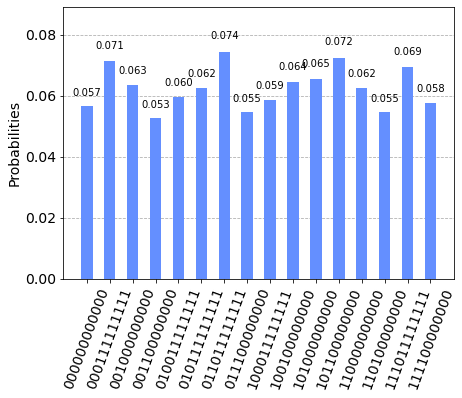

In [10]:
#打印概率直方图
plot_histogram(counts)

In [11]:
infIndex = []
for i in counts:
    infIndex.append(i)

In [12]:
#将测量得到的量子态还原为经典图像
color_value = []
index_value = []
#00为R通道
channel0_0 = {}
#01为G通道
channel0_1 = {}
#10为B通道
channel1_0 = {}
#11实际上可作为透明度通道，但是这里没有任何操作，可要可不要
channel1_1 = {}
for pix in infIndex:
    if pix[2:4] == '00':
        key = int(pix[0:2], 2)
        val = int(pix[4:12], 2)
        channel0_0[key] = val
    elif pix[2:4] == '01':
        key = int(pix[0:2], 2)
        val = int(pix[4:12], 2)
        channel0_1[key] = val
    elif pix[2:4] == '10':
        key = int(pix[0:2], 2)
        val = int(pix[4:12], 2)
        channel1_0[key] = val
    elif pix[2:4] == '11':
        key = int(pix[0:2], 2)
        val = int(pix[4:12], 2)
        channel1_1[key] = val

In [13]:
#实际舍弃了11
channel_R = []
channel_G = []
channel_B = []
for i in range(4):
    channel_R.append(channel0_0[i])
    channel_G.append(channel0_1[i])
    channel_B.append(channel1_0[i])

In [14]:
#将数据从list转为np.array,便于升维或者说转变为RGB图片
channel_R = np.array(channel_R).reshape(2, 2, 1)
channel_G = np.array(channel_G).reshape(2, 2, 1)
channel_B = np.array(channel_B).reshape(2, 2, 1)

In [17]:
Image = np.dstack((channel_R, channel_G))

In [18]:
Image = np.dstack((Image, channel_B))

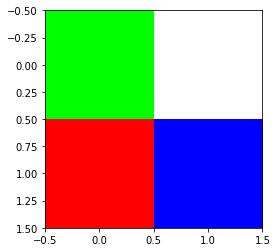

In [19]:
plt.imshow(Image)